In [42]:
import numpy as np
import scipy.io as sio
from scipy.signal import hilbert
import matplotlib.pyplot as plt
% matplotlib notebook

OB_5min = sio.loadmat('/Users/brainbow/Documents/LFP_Sonification/raw_lfp_mat_files/OB_5min.mat')['OB_5min'][0]

In [43]:
OB_5min.shape

(600000,)

<IPython.core.display.Javascript object>


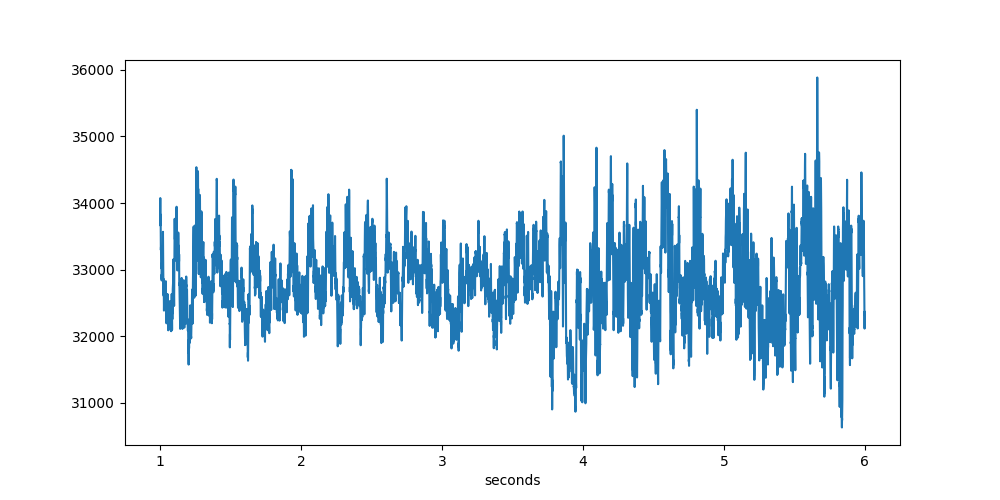

Text(0.5,0,'seconds')

In [44]:
Fs = 2000 # Hz
tvec = np.arange(0,len(OB_5min)/Fs,1/Fs)
win = range(2000,12000)
# win = range(2000,6000)

#win = range(22000,212000)

signal = OB_5min[win]
tvec = tvec[win]

plt.figure(figsize=(10,5))
plt.plot(tvec,signal)
plt.xlabel('seconds')

<IPython.core.display.Javascript object>


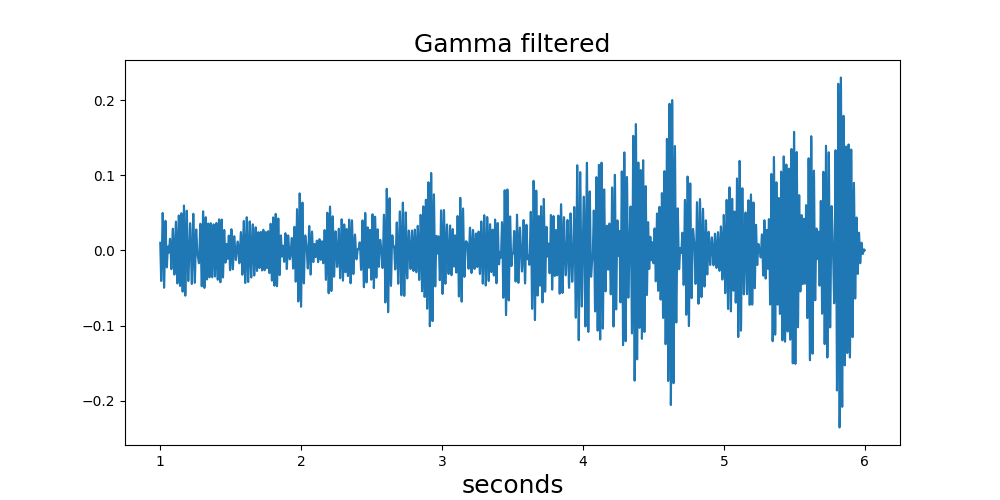

Text(0.5,0,'seconds')

In [4]:
from scipy.signal import hilbert, butter, filtfilt

def butter_bandpass(lowcut, highcut, Fs, order=5):
    nyq = 0.5 * Fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# mean center and normalize
signal = signal - np.mean(signal)
signal = signal/np.max(signal)

# Gamma fq
b, a = butter_bandpass(40,60,Fs,order=5)
signal_gamma = filtfilt(b, a, signal)

plt.figure(figsize=(10,5))
plt.plot(tvec,signal_gamma)
plt.title('Gamma filtered',fontsize=18)
plt.xlabel('seconds',fontsize=18)


<IPython.core.display.Javascript object>


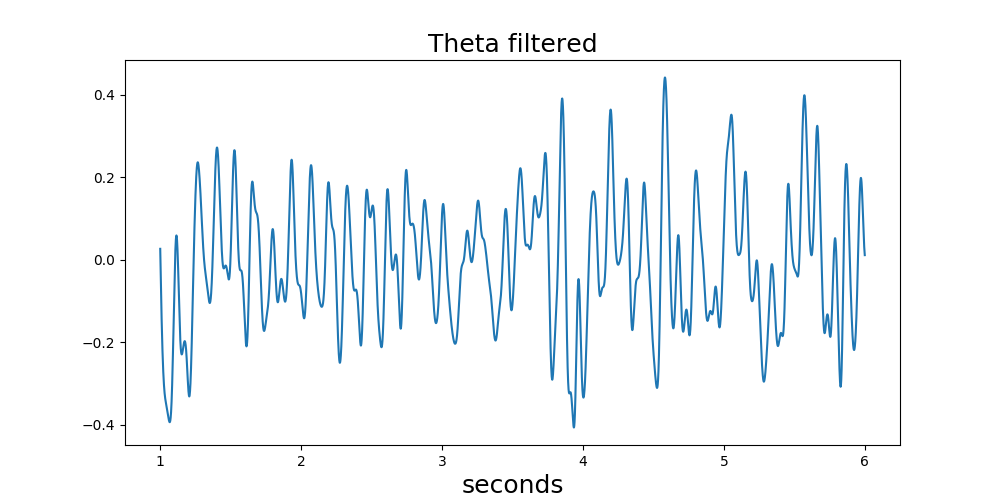

Text(0.5,0,'seconds')

In [5]:
# Theta fq
b, a = butter_bandpass(1,20,Fs,order=3)
signal_theta = filtfilt(b, a, signal)

plt.figure(figsize=(10,5))
plt.plot(tvec,signal_theta)
plt.title('Theta filtered',fontsize=18)
plt.xlabel('seconds',fontsize=18)


<IPython.core.display.Javascript object>


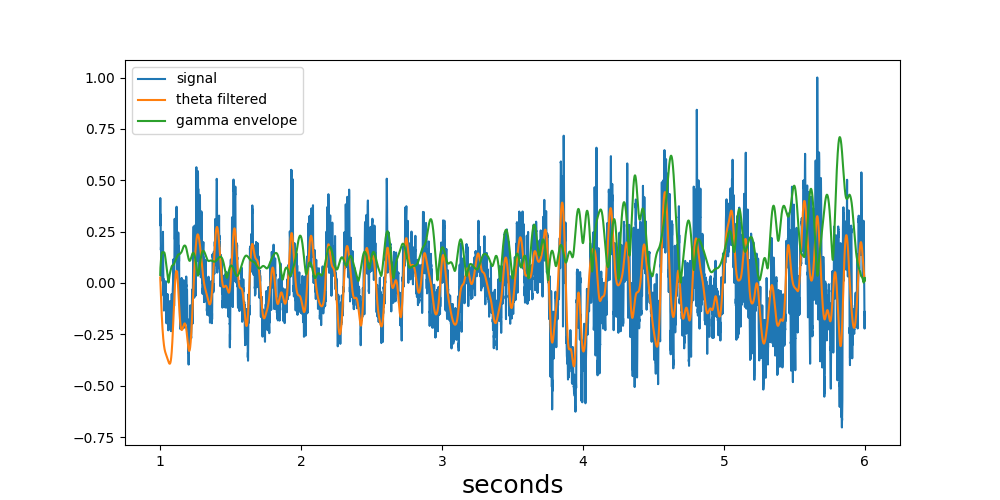

In [6]:
gamma_analytic_signal = hilbert(signal_gamma)
gamma_amplitude_envelope = np.abs(gamma_analytic_signal)
plt.figure(figsize=(10,5))
plt.plot(tvec,signal)
plt.plot(tvec,signal_theta)
plt.plot(tvec,3*gamma_amplitude_envelope)
plt.xlabel('seconds',fontsize=18)
plt.legend(['signal','theta filtered','gamma envelope'])

In [18]:
np.savetxt('LFP_Sonification/signal_5s_2khz.txt', signal, fmt='%.4f', newline=',')
np.savetxt('LFP_Sonification/theta_filt_5s_2khz.txt', signal_theta, fmt='%.4f', newline=',')
np.savetxt('LFP_Sonification/gamma_env_5s_2khz.txt', gamma_amplitude_envelope, fmt='%.4f', newline=',')


<IPython.core.display.Javascript object>


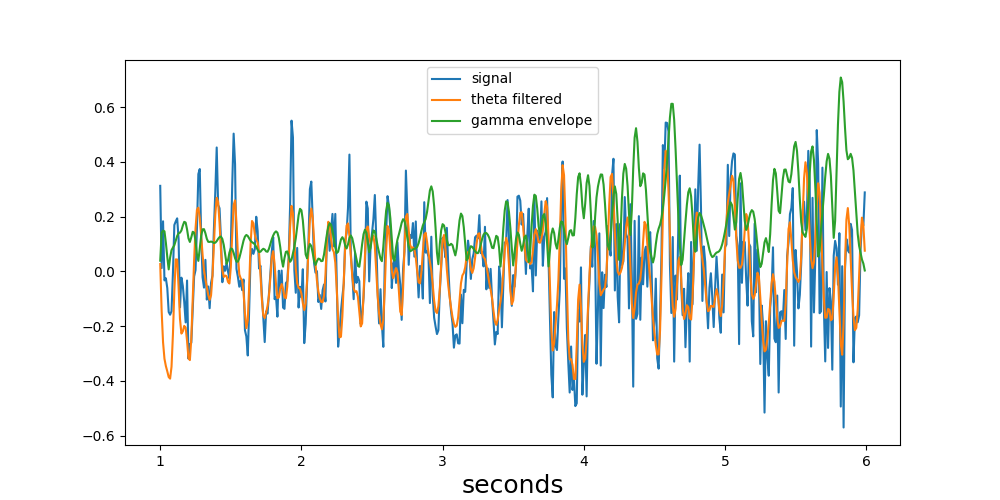

In [7]:
# sample at 100Hz
gamma_analytic_signal = hilbert(signal_gamma)
gamma_amplitude_envelope = np.abs(gamma_analytic_signal)
plt.figure(figsize=(10,5))
plt.plot(tvec[::20],signal[::20])
plt.plot(tvec[::20],signal_theta[::20])
plt.plot(tvec[::20],3*gamma_amplitude_envelope[::20])
plt.xlabel('seconds',fontsize=18)
plt.legend(['signal','theta filtered','gamma envelope'])

In [20]:
np.savetxt('LFP_Sonification/signal_5s_100hz.txt', signal[::20], fmt='%.4f', newline=',')
np.savetxt('LFP_Sonification/theta_filt_5s_100hz.txt', signal_theta[::20], fmt='%.4f', newline=',')
np.savetxt('LFP_Sonification/gamma_env_5s_100hz.txt', gamma_amplitude_envelope[::20], fmt='%.4f', newline=',')

In [ ]:
# Save peaks of theta and gamma

<IPython.core.display.Javascript object>


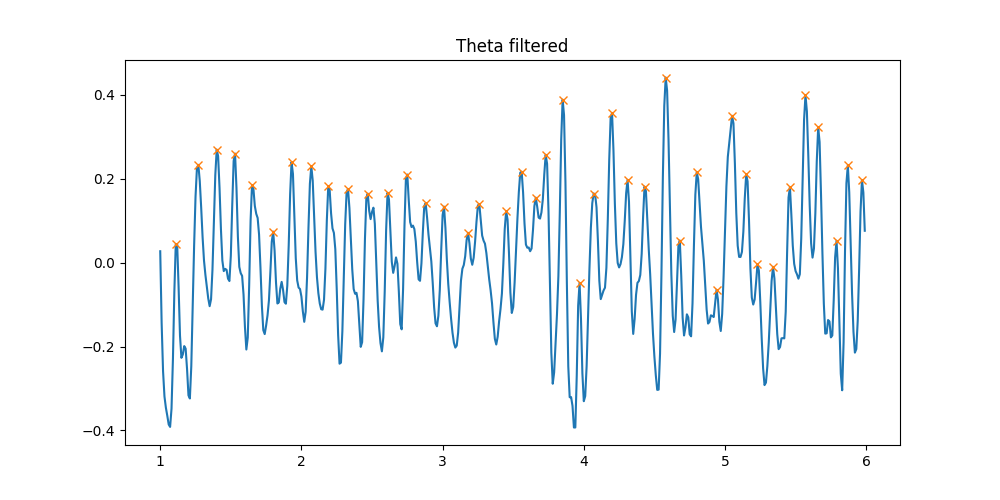

Text(0.5,1,'Theta filtered')

In [34]:
from scipy.signal import find_peaks, find_peaks_cwt
x = signal_theta[::20]
#peaks = find_peaks_cwt(x,np.arange(1,3))
peaks,_ = find_peaks(x,distance=7)
plt.figure(figsize=(10,5))
plt.plot(tvec[::20],x)
plt.plot(tvec[::20][peaks], x[peaks], "x")
plt.title('Theta filtered')

In [ ]:
# save times at which theta peaks occur
np.savetxt('LFP_Sonification/theta_filt_5s_peak_times.txt', tvec[::20][peaks], fmt='%.4f', newline=',')

In [36]:
# bin theta into bins

binned_theta = np.histogram(tvec[::20][peaks],100)[0]

# save binned theta peaks
np.savetxt('LFP_Sonification/theta_filt_5s_binned_20Hz.txt', binned_theta, fmt='%d', newline=',')

In [30]:
len([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])/5

20.0

<IPython.core.display.Javascript object>


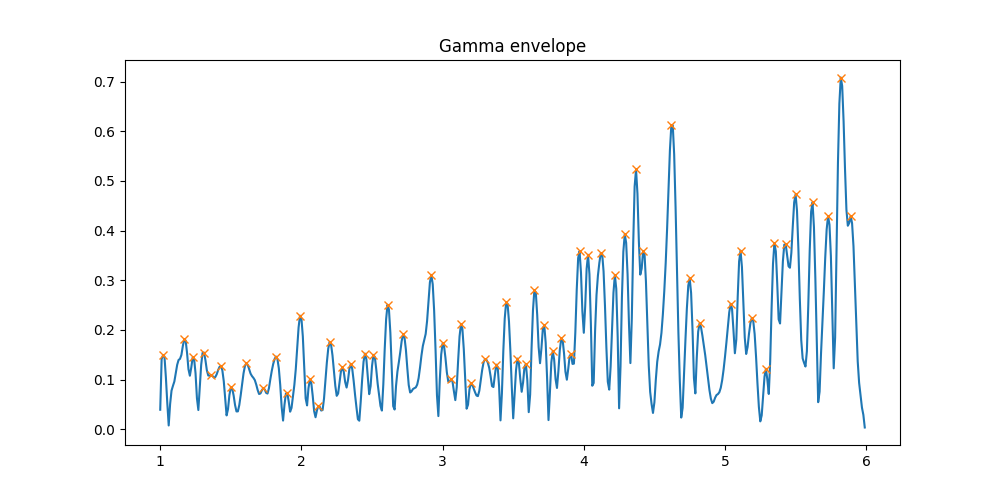

Text(0.5,1,'Gamma envelope')

In [37]:
from scipy.signal import find_peaks, find_peaks_cwt
x = 3*gamma_amplitude_envelope[::20]
#peaks = find_peaks_cwt(x,np.arange(1,3))
peaks,_ = find_peaks(x,height=0)
plt.figure(figsize=(10,5))
plt.plot(tvec[::20],x)
plt.plot(tvec[::20][peaks], x[peaks], "x")
plt.title('Gamma envelope')

In [24]:
# save times at which theta peaks occur
np.savetxt('LFP_Sonification/gamma_env_5s_peak_times.txt', tvec[::20][peaks], fmt='%.4f', newline=',')

In [38]:
# bin gamma into bins

binned_gamma = np.histogram(tvec[::20][peaks],100)[0]

# save binned gamma peaks
np.savetxt('LFP_Sonification/gamma_env_5s_binned_20Hz.txt', binned_gamma, fmt='%d', newline=',')

In [3]:
scipy.signal.fi

In [30]:
! pip install --upgrade scipy

    100% |████████████████████████████████| 28.5MB 52kB/s  eta 0:00:01
    100% |████████████████████████████████| 15.1MB 97kB/s eta 0:00:011  12% |████▏                           | 2.0MB 1.3MB/s eta 0:00:10
  Found existing installation: numpy 1.13.1
    Uninstalling numpy-1.13.1:
      Successfully uninstalled numpy-1.13.1
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1
You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Condense into a single function

In [2]:
import numpy as np
import scipy.io as sio
from scipy.signal import hilbert

def discretize_gamma_theta_peaks(signal, Fs=2000, Fds=100, Fbn=20):
    # returns raster of peaks of gamma filteed envelope and theta filtered signal
    # INPUTS:
    # signal  -  continuous LFP signal
    # Fs  -  sampling fq of LFP signal (Hz)
    # Fds  -  downsampled frequency (Hz)
    # Fbn  -  Binning frequency(for binning peak times)
    # Generally Fs > Fds > Fbn
    
    # Note: find_peaks height & distance params have been fine tuned to work at 100Hz
    
    from scipy.signal import hilbert, butter, filtfilt, find_peaks, find_peaks_cwt

    def butter_bandpass(lowcut, highcut, Fs, order=5):
        nyq = 0.5 * Fs
        low = lowcut / nyq
        high = highcut / nyq
        b, a = butter(order, [low, high], btype='band')
        return b, a

    dur = len(signal)/Fs # total duration of signal in s
    tvec = np.arange(0,dur,1/Fs) # time vector
    step = int(Fs/Fds) # step size to downsample at desired freuqency
    tvec_ds = tvec[::step] # downsampled
    
    # mean center and normalize
    signal = signal - np.mean(signal)
    signal = signal/np.max(signal)

    # Gamma fq
    b, a = butter_bandpass(40,60,Fs,order=5)
    signal_gamma = filtfilt(b, a, signal)
    
    # Theta frequency
    b, a = butter_bandpass(1,20,Fs,order=3)
    signal_theta = filtfilt(b, a, signal)

    # Gamma envelope
    gamma_analytic_signal = hilbert(signal_gamma)
    gamma_amplitude_envelope = np.abs(gamma_analytic_signal)
    
    # Find peaks of gamma filtered env
    gamma_env_ds = gamma_amplitude_envelope[::step]
    peaks,_ = find_peaks(gamma_env_ds,height=0)
    gamma_env_peak_times = tvec_ds[peaks]
    gamma_env_peak_hights = gamma_env_ds[peaks]
    
    # Find peaks of theta filltered signal
    theta_filt_ds = signal_theta[::step]
    peaks,_ = find_peaks(theta_filt_ds,distance=7)
    theta_filt_peak_times = tvec_ds[peaks]
    theta_filt_peak_hights = theta_filt_ds[peaks]
    
    
    # downsampled frequency (used for plotting)
    binned_gamma = np.histogram(gamma_env_peak_times,np.arange(0,dur+(1/Fds),1/Fds))[0]
    masked_gamma_env = np.multiply(gamma_env_ds,binned_gamma)
    masked_gamma_env = np.where(masked_gamma_env==0,np.nan,masked_gamma_env) # set 0s to nan
    binned_theta = np.histogram(theta_filt_peak_times,np.arange(0,dur+(1/Fds),1/Fds))[0]
    masked_theta_filt = np.multiply(theta_filt_ds,binned_theta)
    masked_theta_filt = np.where(masked_theta_filt==0,np.nan,masked_theta_filt) # set 0s to nan
    
    # # Bin gamma env & theta filt into rasters (used for sonification)
    #binned_gamma_sonify = np.histogram(gamma_env_peak_times,int(dur*Fbn))[0] # using nbins
    #binned_theta_sonify = np.histogram(theta_filt_peak_times,int(dur*Fbn))[0] # using nbins
    binned_gamma_sonify = np.histogram(gamma_env_peak_times,np.arange(0,dur+(1/Fbn),1/Fbn))[0] # using edges
    binned_theta_sonify = np.histogram(theta_filt_peak_times,np.arange(0,dur+(1/Fbn),1/Fbn))[0] # using edges
    
    
    out_dict = {
            'tvec_ds':tvec_ds,
            'gamma_env_ds':gamma_env_ds,
            'gamma_env_peak_times':gamma_env_peak_times,
            'gamma_env_peak_hights':gamma_env_peak_hights,
            'theta_filt_ds':theta_filt_ds,
            'theta_filt_peak_times':theta_filt_peak_times,
            'theta_filt_peak_hights':theta_filt_peak_hights,
            'masked_gamma_env':masked_gamma_env,
            'masked_theta_filt':masked_theta_filt,
            'binned_gamma_sonify':binned_gamma_sonify,
            'binned_theta_sonify':binned_theta_sonify,
            'binned_theta':binned_theta
                }
    return out_dict
    

In [3]:
OB_5min = sio.loadmat('/Users/brainbow/Documents/LFP_Sonification/raw_lfp_mat_files/OB_5min.mat')['OB_5min'][0]

Fs = 2000 # Hz
tvec = np.arange(0,len(OB_5min)/Fs,1/Fs)
win = range(2000,12000)
# win = range(2000,6000)

#win = range(22000,212000)

signal = OB_5min[win]
tvec = tvec[win]

out_dict = discretize_gamma_theta_peaks(signal, Fs=2000, Fds=100, Fbn=20)
out_dict.keys()

dict_keys(['tvec_ds', 'gamma_env_ds', 'gamma_env_peak_times', 'gamma_env_peak_hights', 'theta_filt_ds', 'theta_filt_peak_times', 'theta_filt_peak_hights', 'masked_gamma_env', 'masked_theta_filt', 'binned_gamma_sonify', 'binned_theta_sonify', 'binned_theta'])

### save gamma & theta using corrected binning strategy

In [5]:
# save binned theta peaks
np.savetxt('data_files/theta_filt_5s_binned_20Hz_corrected.txt', out_dict['binned_theta_sonify'], fmt='%d', newline=',')
# save binned gamma peaks
np.savetxt('data_files/gamma_env_5s_binned_20Hz_corrected.txt', out_dict['binned_gamma_sonify'], fmt='%d', newline=',')